# Objectives
YWBAT
* identify where ridge and lasso regression take place in gradient descent
* explain what the regularization coefficient does for ridge/lasso regression
* explain which is more 'strict' and why

# Regularization 
* Punishes models with high complexity (lots of beta coefficients)
* The more beta coefficients the higher the cost


## Not all Regularizers are made equal
* Ridge is 
* Lasso is 

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge, Lasso

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/OLSChallenge.csv", encoding="ISO-8859-1")
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
target = 'TARGET_deathRate'
numerical_cols = df.drop(columns=[target]).select_dtypes(exclude=['object']).columns
twenty_cols = np.random.choice(numerical_cols, size=20)

In [5]:
X, y = df[twenty_cols], df[target]

In [6]:
X.fillna(0, inplace=True)

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [44]:
# ridge is where you add a*sum(betas^2)
alpha=1.5
ridge = Ridge(fit_intercept=False)
ridge.fit(X, y)

Ridge(fit_intercept=False)

In [49]:
def plot_coef(model, columns, title=None):
    coefs = np.abs(model.coef_)
    plt.bar(columns, coefs)
    plt.xticks(rotation=90)
    if title:
        plt.title(title)
    plt.show()

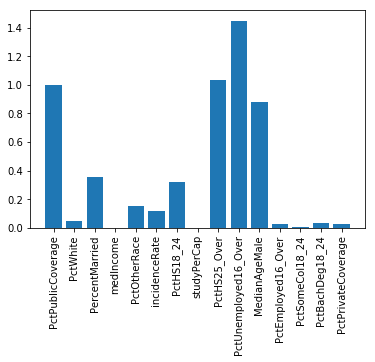

In [46]:
plot_coef(ridge, columns=twenty_cols)

In [47]:
lasso = Lasso(fit_intercept=False)
lasso.fit(X,y)

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666806.5659379169, tolerance: 9960.868794
  positive)


Lasso(fit_intercept=False)

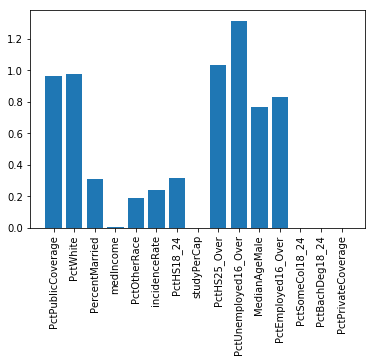

In [48]:
plot_coef(lasso, columns=twenty_cols)

In [55]:
def compare_ridge_lasso(alpha=1.5, fit_intercept=False, max_iter=10000):
    ridge = Ridge(alpha=alpha, fit_intercept=fit_intercept, max_iter=max_iter)
    lasso = Lasso(alpha=alpha, fit_intercept=fit_intercept, max_iter=max_iter)
    ridge.fit(X, y)
    lasso.fit(X, y)
    plot_coef(ridge, columns=X.columns, title=f"Ridge with alpha={alpha}")
    plot_coef(lasso, columns=X.columns, title=f"Lasso with alpha={alpha}")

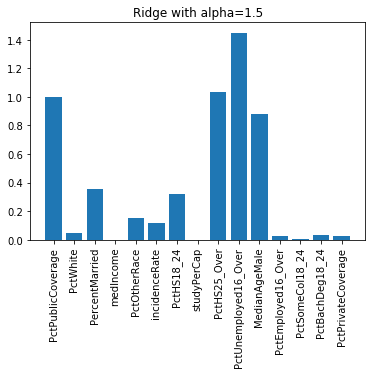

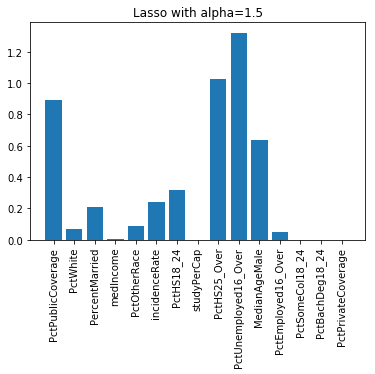

In [56]:
compare_ridge_lasso()

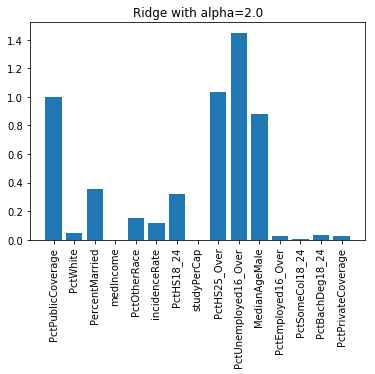

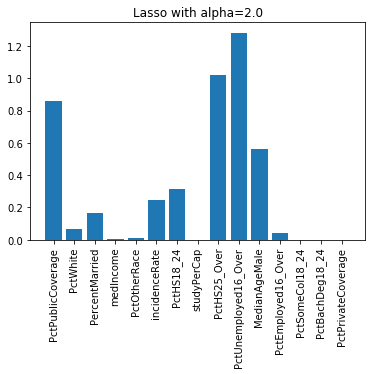

In [58]:
compare_ridge_lasso(alpha=2.0, max_iter=40000)

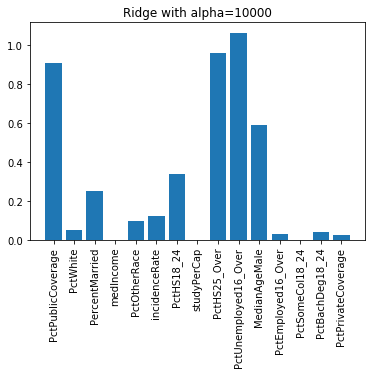

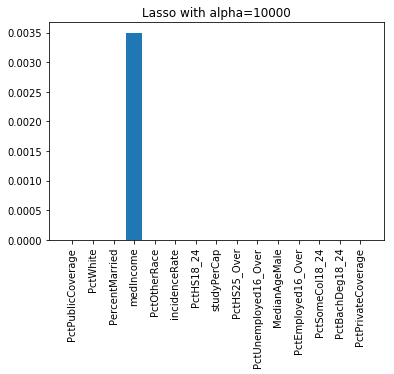

In [59]:
compare_ridge_lasso(alpha=10000)

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643074.0808580911, tolerance: 9960.868794
  positive)


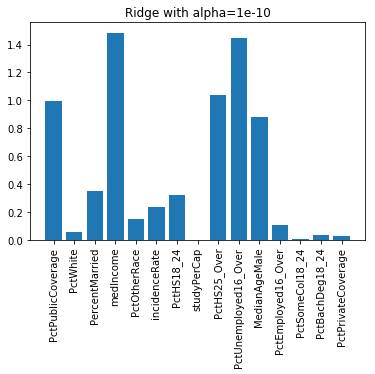

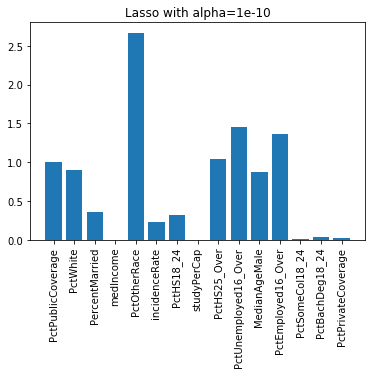

In [61]:
compare_ridge_lasso(alpha=0.0000000001)

In [ ]:
compare_ridge_lasso(alpha=0.0000001, max_iter=100000)

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.1809e-20): result may not be accurate.
  overwrite_a=True).T


# What did we learn? 
* the equations for ridge and lasso
* that we used ridge regression in Phase 2 project
* lasso is more strict bc it drops coeff to abs zero wheras ridge lowers them but it almost never reaches zero
* useful to graph the penalized coefficients instead of printing them as an array 
* lasso is an acronym
    * least absolute shrinkiage selection operator
* that even very small penalties can affect the fit 
* can tune lasso/ridge using alpha parameter

In [9]:
# how do we find the best alpha?
alphas = np.linspace(0.5, 5.0, 10)

In [10]:
from sklearn.model_selection import GridSearchCV

In [13]:
# these are called hyperparameters
params = {
    "alpha":alphas, # 10 candidates
    "fit_intercept": [True, False] # 2 candidates
}

# total of 20 candidates

In [18]:
ridge = Ridge()
gscv = GridSearchCV(ridge, param_grid=params, scoring='r2', n_jobs=-1, verbose=2)

In [19]:
gscv.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'fit_intercept': [True, False]},
             scoring='r2', verbose=2)

In [23]:
best_ridge = gscv.best_estimator_

In [24]:
best_ridge.score(X, y)

0.4910116176264361